# 1. AutoEncoder MNIST

Reference: https://www.youtube.com/watch?v=CCipk_ZH49I

## Input libraries

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# TensorFlow
import tensorflow as tf

In [12]:
# Keras
from keras.datasets import mnist

from keras.models import Model
from keras.layers import Input, Dense

In [13]:
# Other Libraries
import numpy as np
import matplotlib.pyplot as plt

In [14]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train.shape

(60000, 28, 28)

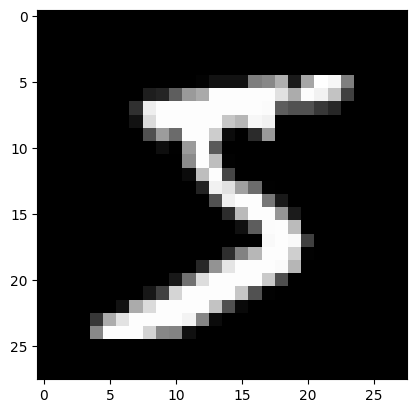

In [15]:
# Visualize one image
plt.imshow(X_train[0], cmap='gray')

### Preprocess the data

In [16]:
X_train[0].shape[0]

28

In [17]:
X_train.shape[0]

60000

In [18]:
28*28

784

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
X_test.shape

(10000, 28, 28)

x_train contains 60000 images of 28x28 pixels each. Now, we need to flatten the images into vectors of 28x28 = 784 pixels each. The result is that x_train will be a matrix of 6000 x 784 (28*28). We will repeat the same for x_test 10000 x 784 (28*28).

In [21]:
# Convert 2D image into 1D vector
X_train = X_train.reshape(X_train.shape[0], X_train[0].shape[0]*X_train[0].shape[1])
X_train.shape

(60000, 784)

In [22]:
X_test = X_test.reshape(X_test.shape[0], X_test[0].shape[0]*X_test[0].shape[1])
X_test.shape

(10000, 784)

Check the amplitude of the values in the x_train and x_test matrices. The values are between 0 and 255. We will normalize the values between 0 and 1 by dividing by 255.

In [23]:
X_train.max()

255

Normalize the data dividing the dataset by the max number, in this case 255.

In [24]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

Check if the values are between 0 and 1.

In [25]:
X_train.max()

1.0

## Model

In [26]:
# Define Layers
input_layer = Input(shape=(X_train.shape[1])) # 784 (28*28)
latent_space = Dense(32, activation='relu', name = 'latent_space')(input_layer) # 32
output_layer = Dense(X_train.shape[1], activation='sigmoid', name = 'output_layer')(latent_space) # 784 (28*28)

In [27]:
# Connect Layers intop the Model
autoencoder = Model(input_layer, output_layer)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 latent_space (Dense)        (None, 32)                25120     
                                                                 
 output_layer (Dense)        (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Make a independent reference to the encoder part of the model
encoder = Model(input_layer, latent_space)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 latent_space (Dense)        (None, 32)                25120     
                                                                 
Total params: 25120 (98.12 KB)
Trainable params: 25120 (98.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Make a independent reference to the decoder part of the model
encoded_layer = Input(shape=(32,), name='encoded_layer')
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_layer, decoder_layer(encoded_layer))

In [30]:
# Compile the model using MSE loss and Adam Optimizer
autoencoder.compile(loss='mse', optimizer='adam')

In [31]:
# Fit training data to the model
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 5s 3ms/step - loss: 0.0546
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0261
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0189
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0152
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0132
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0121
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0115
Epoch 8/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0112
Epoch 9/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0110
Epoch 10/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0109
Epoch 11/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0108
Epoch 12/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0107
Epoch 13/50
469/469 [====

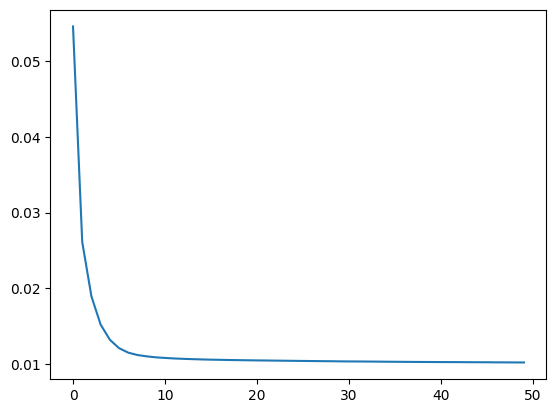

In [32]:
# Plot the training loss
plt.plot(history.history['loss'])

In [34]:
# Reconstruction 
encoded_data = encoder.predict(X_test, batch_size=512)
encoded_data.shape

20/20 [==============================] - 0s 2ms/step


(10000, 32)

In [35]:
# Reconstruct Output
output_data = decoder.predict(encoded_data,  batch_size=512)
output_data.shape

20/20 [==============================] - 0s 1ms/step


(10000, 784)

In [36]:
# Re-shape the test data
X_test = X_test.reshape(X_test.shape[0], 28, 28)
X_test.shape

(10000, 28, 28)

In [37]:
# Re-shape the output data into a 28 x 28 pixel image
output_data = output_data.reshape(output_data.shape[0], 28, 28)
output_data.shape

(10000, 28, 28)

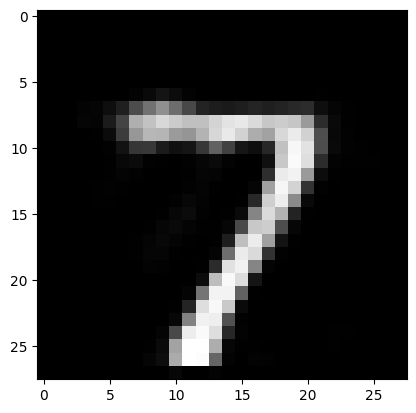

In [38]:
plt.imshow(output_data[0], cmap='gray')

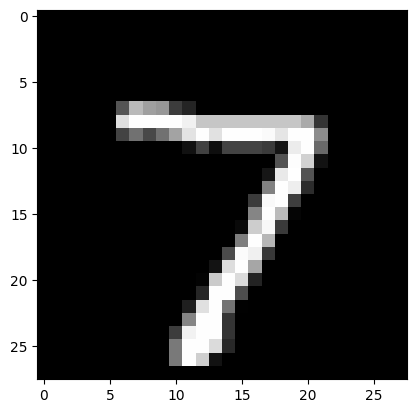

In [39]:
# Show test image
plt.imshow(X_test[0], cmap='gray')

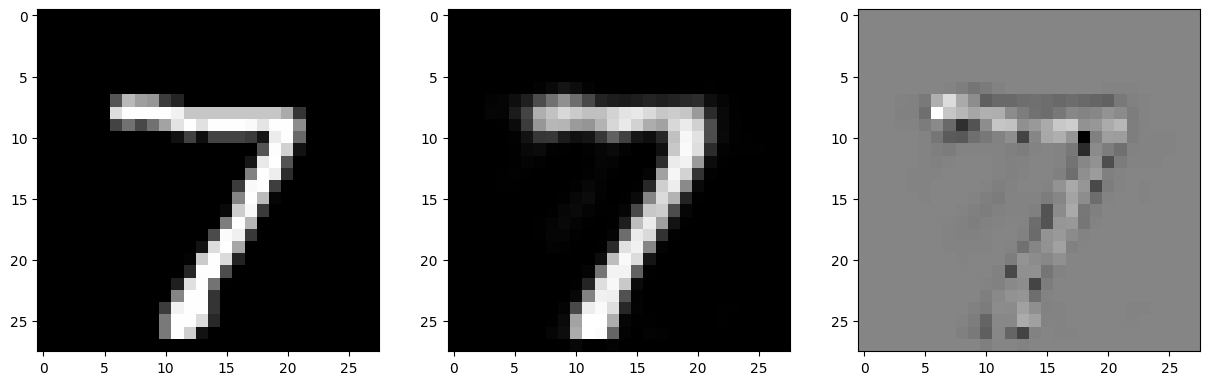

In [40]:
# Create a 1 row 3 column grid plot, where the 1st image is the test, 2nd is the output and 3rd is the difference between the two
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
axes[0].imshow(X_test[0], cmap='gray')
axes[1].imshow(output_data[0], cmap='gray')
axes[2].imshow(X_test[0] - output_data[0], cmap='gray')
plt.show()